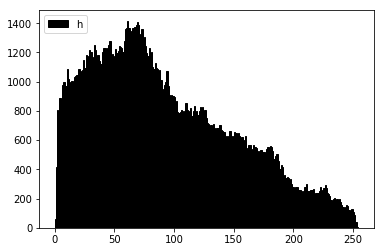

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = cv2.imread('./1.jpg')

#resizing the  image
scale_percent = 30 
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height) 
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

#gray scale conversion
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#hist = cv2.calcHist([img],[gray],None,[256],[0,256])
%matplotlib inline
plt.hist(gray.ravel(), bins=256, range=(0, 255), fc='k', ec='k') 
plt.legend(('hst'), loc = 'upper left')

plt.show()

cv2.imshow('Image',img)
cv2.waitKey(0)

cv2.imshow('Gray Image',gray)

cv2.waitKey(0)

img_neg = 255 - img

cv2.imshow('Negative Image',img_neg)

cv2.waitKey(0)
# hist,bins = np.histogram(gray.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * hist.max()/ cdf.max()
# plt.plot(cdf_normalized, color = 'b')
# plt.hist(gray.flatten(),256,[0,256], color = 'r')
# plt.xlim([0,256])
# plt.show()

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(gray,-1,kernel)
cv2.imshow('5x5 Filter',dst)
cv2.waitKey(0)


kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(gray,-1,kernel)
cv2.imshow('3x3 Filter',dst)
cv2.waitKey(0)


median = cv2.medianBlur(gray, 5)
cv2.imshow('Median Blur', median)
cv2.waitKey(0)



cv2.destroyAllWindows()

#plt.imshow(img)
#plt.colorbar()

In [2]:
# import the necessary packages
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2

def convolve(image, kernel):
    # grab the spatial dimensions of the image, along with
    # the spatial dimensions of the kernel
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
    # allocate memory for the output image, taking care to
    # "pad" the borders of the input image so the spatial
    # size (i.e., width and height) are not reduced
    pad = (kW - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad,cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")
    # loop over the input image, "sliding" the kernel across
    # each (x, y)-coordinate from left-to-right and top to
    # bottom
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            # extract the ROI of the image by extracting the
            # *center* region of the current (x, y)-coordinates
            # dimensions
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            # perform the actual convolution by taking the
            # element-wise multiplicate between the ROI and
            # the kernel, then summing the matrix
            k = (roi * kernel).sum()
            # store the convolved value in the output (x,y)-
            # coordinate of the output image
            output[y - pad, x - pad] = k
    # rescale the output image to be in the range [0, 255]
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
    # return the output image
    return output

# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
#     help="path to the input image")
# args = vars(ap.parse_args())
# construct average blurring kernels used to smooth an image
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))
# construct a sharpening filter
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")


kernelBank = (
    ("small_blur", smallBlur),
    ("large_blur", largeBlur),
    ("sharpen", sharpen)
)

img = cv2.imread('./1.jpg')
scale_percent = 30 
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height) 
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# loop over the kernels
for (kernelName, kernel) in kernelBank:
    # apply the kernel to the grayscale image using both
    # our custom `convole` function and OpenCV's `filter2D`
    # function
    print("[INFO] applying {} kernel".format(kernelName))
    convoleOutput = convolve(gray, kernel)
    opencvOutput = cv2.filter2D(gray, -1, kernel)
    # show the output images
    cv2.imshow("original", gray)
    cv2.imshow("{} - convole".format(kernelName), convoleOutput)
    cv2.imshow("{} - opencv".format(kernelName), opencvOutput)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

[INFO] applying small_blur kernel
[INFO] applying large_blur kernel
[INFO] applying sharpen kernel


In [2]:
import numpy as np
import cv2
# Read the image in greyscale
img = cv2.imread('./1.jpg',0)
scale_percent = 15 
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height) 
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
#Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits
 
# We have a list of strings where each string represents binary pixel value. To extract bit planes we need to iterate over the strings and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])
 
#Concatenate these images for ease of display using cv2.hconcat()
finalr = cv2.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
finalv =cv2.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])
 
# Vertically concatenate
cv2.imshow('a',finalr)
cv2.waitKey(0) 
# cv2.imshow('a',finalv)
# cv2.waitKey(0) 
# final = cv2.vconcat([finalr,finalv])
 
# Display the images
# cv2.imshow('a',final)
# cv2.waitKey(0) 

-1

In [6]:

import cv2 
import numpy as np 
  
# Open the image. 
img = cv2.imread('./1.jpg') 
scale_percent = 30 
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height) 
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

for gamma in [0.1, 0.5, 1.2, 2.2]: 
      
    # Apply gamma correction. 
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8') 
  
    # Save edited images. 
    cv2.imshow('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected) 
    cv2.waitKey(0)
   
cv2.destroyAllWindows();